In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import random

In [148]:
#loading csv
df=pd.read_csv("train_auto.csv")
df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [149]:
df.shape

(8161, 26)

In [150]:
#missing value analysis
(df.isnull().sum()/len(df))*100

INDEX          0.000000
TARGET_FLAG    0.000000
TARGET_AMT     0.000000
KIDSDRIV       0.000000
AGE            0.073520
HOMEKIDS       0.000000
YOJ            5.563044
INCOME         5.452763
PARENT1        0.000000
HOME_VAL       5.685578
MSTATUS        0.000000
SEX            0.000000
EDUCATION      0.000000
JOB            6.445289
TRAVTIME       0.000000
CAR_USE        0.000000
BLUEBOOK       0.000000
TIF            0.000000
CAR_TYPE       0.000000
RED_CAR        0.000000
OLDCLAIM       0.000000
CLM_FREQ       0.000000
REVOKED        0.000000
MVR_PTS        0.000000
CAR_AGE        6.249234
URBANICITY     0.000000
dtype: float64

In [151]:
#dropping na values
df.dropna(inplace=True)

#### Since the missing percentage at max is 6%, we can drop these rows, however while fine tuning the model we can try to impute this values using IterativeImputer.

In [152]:
df.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,5090.021340,0.265012,1479.662715,0.173201,44.628453,0.743424,10.494624,33.694293,5.360298,0.784119,1.699752,7.920926
std,2980.105025,0.441376,4553.172055,0.515424,8.707805,1.132740,4.138508,15.892961,4.144664,1.153884,2.157899,5.583880
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2470.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,23.000000,1.000000,0.000000,0.000000,1.000000
50%,5060.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7667.000000,1.000000,1037.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,85523.653347,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


# Data Exploration

In [153]:
df.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

In [154]:
print((df.TARGET_FLAG.value_counts()/len(df))*100,"%")

0    73.498759
1    26.501241
Name: TARGET_FLAG, dtype: float64 %


#### Approximately 30% of audience has filled for claims at some point or another.Also the dataset is imbalanced as expected.

## Distibution of target amt

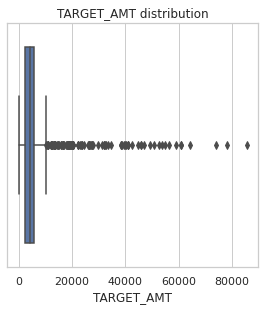

In [155]:
sns.set(rc={'figure.figsize':(4.5,4.5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[df["TARGET_AMT"]!=0].TARGET_AMT).set_title('TARGET_AMT distribution')

#### There are a lot of outliers present so we can visualize the same distribution on amounts greater than 20,000.


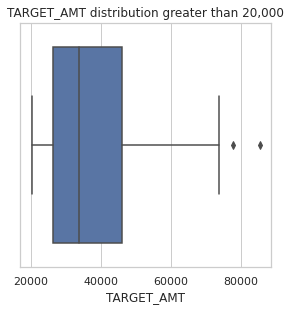

In [156]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[df["TARGET_AMT"]>20000].TARGET_AMT).set_title('TARGET_AMT distribution greater than 20,000')

## Overall amount distribution of all claims

<AxesSubplot:title={'center':'Target amount distribution'}, xlabel='TARGET_AMT'>

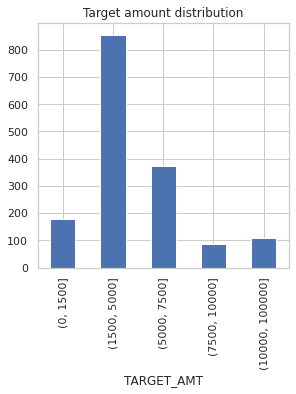

In [157]:
#selecting values where claims have been made
df1=df[df['TARGET_AMT']!=0]
#customized bins for count distribution
bins = [0,1500,5000,7500,10000,100000]
df1 = df1.groupby(pd.cut(df1[df1["TARGET_AMT"]!=0].TARGET_AMT, bins=bins)).TARGET_AMT.count()
df1.plot(kind='bar',title='Target amount distribution')

#### From the above graph it is observable that most of the insurance claims lie between 1500-5000 and most less than 200 people make the heighest claims of >10K

## Cleaning up the income and other monetary columns and plotting income distribution

In [158]:
#cleaning the columns by replacing ",","$" and and converting it into integer
cols= ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for c in cols:
    df[c] = df[c].str.replace(',', '')
    df[c] = df[c].str.replace('$', '')
    df[c]=df[c].astype(int)

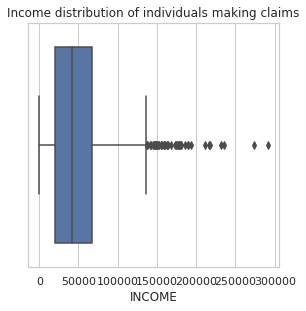

In [159]:
df2=df[df["TARGET_FLAG"]!=0]
ax = sns.boxplot(x=df2['INCOME']).set_title('Income distribution of individuals making claims')

## Distribution of claim amount wrt the income and age

Text(0.5, 1.0, 'Distribution of claim amount wrt the income and age')

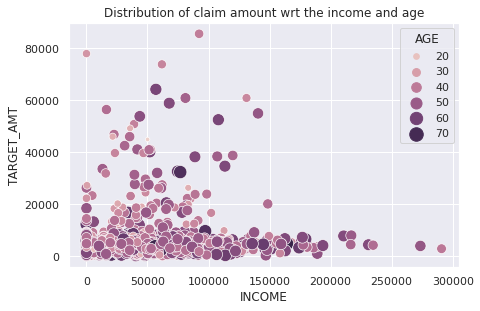

In [160]:
sns.set(rc={'figure.figsize':(7,4.5)})

sns.scatterplot(data=df2, x="INCOME", y="TARGET_AMT",hue="AGE", size="AGE",sizes=(20, 200)).set_title("Distribution of claim amount wrt the income and age")

#### Highest insurance claims come from individuals within the bracket [0,150,000] and not the top earners.
#### Their Age ranges from 20-40. There are some points eg target_amt 80000 made by a 20 year old,which could be suspicious


Text(0.5, 1.0, 'Travel time versus target amount')

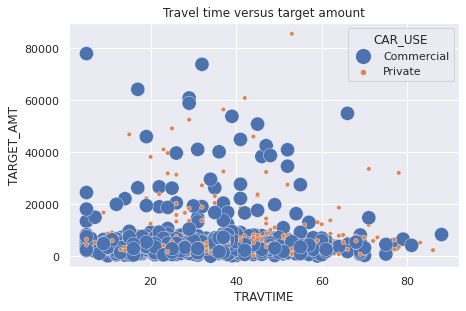

In [161]:
sns.scatterplot(data=df2, y="TARGET_AMT", x="TRAVTIME",hue="CAR_USE", size="CAR_USE",sizes=(20, 200)).set_title('Travel time versus target amount')

#### Most claims are moade by commercial vehicals as compared to private.


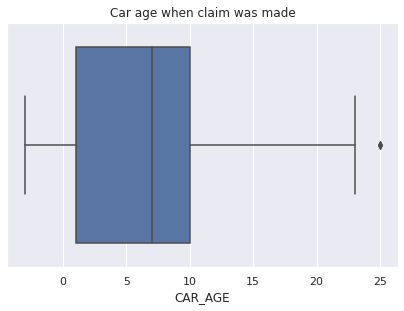

In [162]:
ax = sns.boxplot(x=df2['CAR_AGE']).set_title('Car age when claim was made')

#### Cars between range 1-10 are most likely to make insurance claims


In [163]:
df.head(2)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349,No,0,...,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449,No,257252,...,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban


### Distribution of car type and area wrt claim made

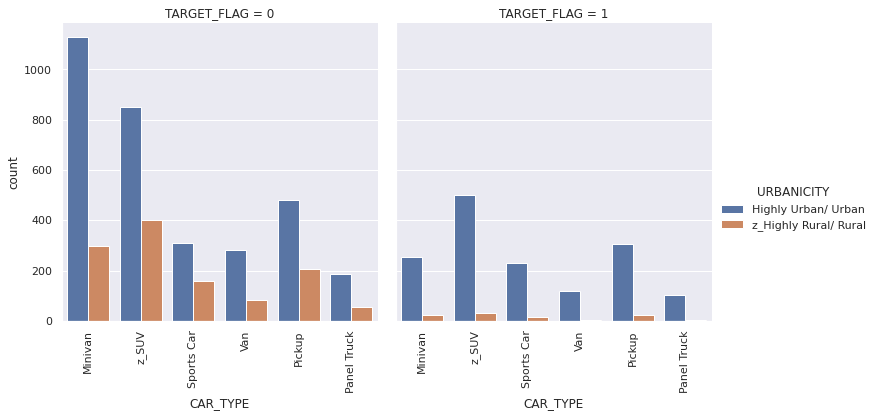

In [173]:
sns.set(rc={'figure.figsize':(24,24)})

g = sns.catplot(hue="URBANICITY", x="CAR_TYPE", col="TARGET_FLAG",
                data=df, kind="count")
g.set_xticklabels(rotation=90)


##### The ratio of suv to minivans are higher when the claims are made as compared to when they are not
##### Significantly higher claims are made in urban areas
##### Most claims in the rural areas are made by SUV owners, whereas none are made by van and panel truck owners


<AxesSubplot:xlabel='HOME_VAL', ylabel='OLDCLAIM'>

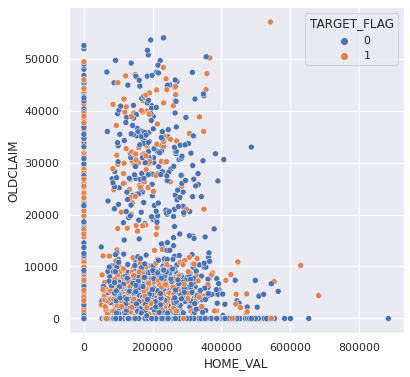

In [179]:
sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot(data=df, y="OLDCLAIM", x="HOME_VAL", hue="TARGET_FLAG")


A large number of old claims are less than 10000 in value

<AxesSubplot:>

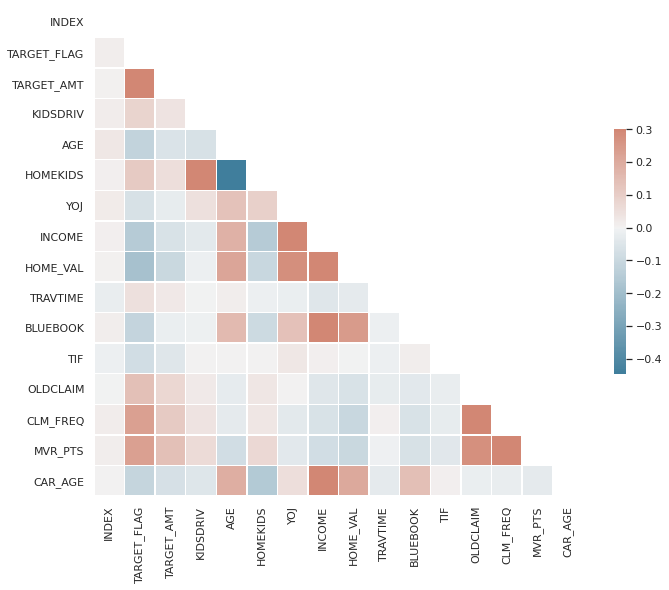

In [32]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### It is observable that target flag is negatively correlated to home_val and income.It is positively correlated to claim frequency and mvr pts
### Within the varibles there is a strong correlation between income,home_val and bluebook with car age.This could be taken into account while tuning logistic regression model.

# Classification model

In [124]:
#one hot encoding
df=pd.get_dummies(df, columns = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'])

In [35]:
#distribution in X and y for training models
X=df[df.columns[~df.columns.isin(['TARGET_FLAG','INDEX','TARGET_AMT'])]]
y = df['TARGET_FLAG']


In [125]:
#defining multiple models for classification
lreg=LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')
sgd=SGDClassifier(max_iter=1000, tol=1e-3)
neigh = KNeighborsClassifier(n_neighbors=3)
gnb=GaussianNB()
Lgb = LGBMClassifier(n_estimators=90, silent=False, random_state =94, max_depth=2,num_leaves=31,objective='binary')
ada=AdaBoostClassifier()
rfc_cv=RandomForestClassifier()

#creating a for loop for testing all models
models=[lreg,rfc_cv,sgd,neigh,gnb,Lgb,ada]
for m in models:
    print(m)
    # adding smote to use representative sampling 
    steps = [('over', SMOTE()), ('model', m)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    for scoring in["recall", "precision","accuracy"]:
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
        scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
        print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())
        

LogisticRegression(C=100, solver='newton-cg')
Model recall  mean= 0.4875245859213251 stddev= 0.044899028139652006
Model precision  mean= 0.6243219482581669 stddev= 0.036637818228111255
Model accuracy  mean= 0.7860475617098132 stddev= 0.01494310281780243
RandomForestClassifier()
Model recall  mean= 0.48835791925465843 stddev= 0.04252711083734277
Model precision  mean= 0.6207508359501861 stddev= 0.04072501239755977
Model accuracy  mean= 0.7826303066790724 stddev= 0.016637675282921857
SGDClassifier()
Model recall  mean= 0.50261516563147 stddev= 0.31862098443732295
Model precision  mean= 0.3358819105375501 stddev= 0.09330801792484826
Model accuracy  mean= 0.544518179993797 stddev= 0.1972478343846108
KNeighborsClassifier(n_neighbors=3)
Model recall  mean= 0.481699016563147 stddev= 0.03525453997853579
Model precision  mean= 0.33408115074403105 stddev= 0.02226639689200072
Model accuracy  mean= 0.6088265557440754 stddev= 0.01704584821204886
GaussianNB()
Model recall  mean= 0.6656366459627328 s

#### From the above pipeline we can observe that GaussianNB,LGBM and AdaBoost are the top three performers. 

Since the tuning of LGBM was giving a run time error I will try to hypertune Adaboost, on recall score to successfully classify as many claims as possible.

## Hyperparameter tuning of ADA-Boost

In [126]:
 # define model
model = AdaBoostClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
print("baseline", np.mean(cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)))

baseline 0.4344668737060041


### Confusion matrix on original ada boost

In [127]:
y_pred = cross_val_predict(model, X, y,  cv=10, n_jobs=-1)
CM = confusion_matrix(y, y_pred)
TN = CM[0][0] 
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print("      Positives: ", 100*round(FN/(TP+FN),2), "% misclassifed     ", FN, '/',TP+FN)
print("      Negatives: ", 100*round(FP/(TN+FP),2), "% misclassifed     ",FP, '/',TN+FP)

      Positives:  56.99999999999999 % misclassifed      915 / 1602
      Negatives:  9.0 % misclassifed      396 / 4443


### Adding smoteenn sampling to above

In [128]:
# define resampling
resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Score: %.3f' % np.mean(scores))

Score: 0.635


#### We can see that the score is improved,possible due to proper sampling

In [55]:
y_pred = cross_val_predict(pipeline, X, y,  cv=10, n_jobs=-1)
CM = confusion_matrix(y, y_pred)
TN = CM[0][0] 
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print("AdaBoost",np.round(np.mean(scores),3))
print("      Positives: ", 100*round(FN/(TP+FN),2), "% misclassifed     ", FN, '/',TP+FN)
print("      Negatives: ", 100*round(FP/(TN+FP),2), "% misclassifed     ",FP, '/',TN+FP)

AdaBoost 0.633
      Positives:  37.0 % misclassifed      600 / 1602
      Negatives:  23.0 % misclassifed      1016 / 4443


### Using grid search CV to estimate the best parameters

In [56]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
#setting up the grid search parameters
search_grid={'m__n_estimators':[200,500,1000,2000],
             'm__learning_rate':[.001,.01,.1,.2]}
#applying grid search on the pipeline
search=GridSearchCV(pipeline,param_grid=search_grid,scoring='recall',n_jobs=1,cv=crossvalidation)
search.fit(X,y)
search.best_params_

{'m__learning_rate': 0.01, 'm__n_estimators': 500}

### Running the model with updated parameters

In [57]:
model = AdaBoostClassifier(learning_rate=0.01,n_estimators=500)
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
y_pred = cross_val_predict(pipeline, X, y,  cv=10, n_jobs=-1)
CM = confusion_matrix(y, y_pred)
TN = CM[0][0] 
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print("AdaBoost",np.round(np.mean(scores),3))
print("      Positives: ", 100*round(FN/(TP+FN),2), "% misclassifed     ", FN, '/',TP+FN)
print("      Negatives: ", 100*round(FP/(TN+FP),2), "% misclassifed     ",FP, '/',TN+FP)

AdaBoost 0.633
      Positives:  27.0 % misclassifed      425 / 1602
      Negatives:  33.0 % misclassifed      1449 / 4443


### We can see that the performance of the model has improved from the baseline.However,it is not significantly higher than that obtained after re-sampling

### Getting feature importance

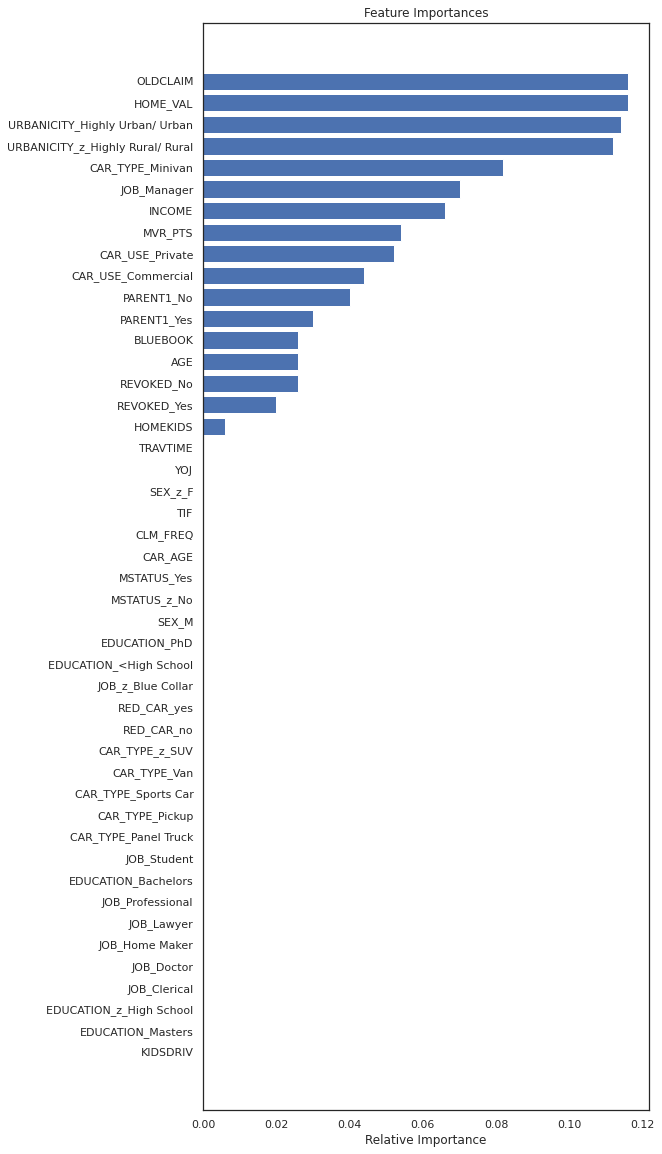

In [63]:
#feature columns
features =X.columns
#defining model
model = AdaBoostClassifier(learning_rate=0.01,n_estimators=500)
model.fit(X,y)
#storing feature importance from sklearn
importances = model.feature_importances_
#sorting the feature importance
indices = np.argsort(importances)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,20)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### OLD_CLAIM,HOME_VAL,Urban/Rural are the most important features for classification.

# Storing model to pickle and using it to make predictions

In [64]:

import pickle
# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)



In [67]:
# Load from file
with open(pkl_filename, append'rb') as file:
    pickle_model = pickle.load(file)
    

In [97]:
#loading Xtest csv and performing basic cleaning operations before making predictions
Xtest=pd.read_csv("test_auto.csv")
#dropping target columns
Xtest=Xtest[Xtest.columns[~Xtest.columns.isin(['TARGET_FLAG','INDEX','TARGET_AMT'])]]
#dropping na values
Xtest.dropna(inplace=True)
#converting monetary columns into int after cleaning
cols= ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
for c in cols:
    Xtest[c] = Xtest[c].str.replace(',', '')
    Xtest[c] = Xtest[c].str.replace('$', '')
    Xtest[c]=Xtest[c].astype(int)
#label encoding columns
Xtest=pd.get_dummies(Xtest, columns = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'])

Xtest.shape

(1612, 46)

In [98]:
#converting predicitions into dataframe
Ypredict = pickle_model.predict(Xtest)
Ypredict=pd.DataFrame(Ypredict)
Xtest['TARGET_FLAGS'] = Ypredict

In [140]:
Ypredict.rename(columns={ Ypredict.columns[0]: "TARGET_PREDICTIONS" }, inplace = True)

In [145]:
Ypredict.to_csv(r'/home/jovyan/survey/Descartes/TARGET_PREDICTIONS.csv', index = False)


# Work in progress

### So far the predictions were made by dropping the na rows,however we canimpute the same by using Bayesian imputer and Categorical Imputer from Sklearn

### Model tuning can also be done on other better performing models